In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
titanic = pd.read_csv('D:/College/Predictive/titanic.csv')

In [9]:
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [10]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [21]:
for i in titanic['Sex']:
    if i=='male':
        titanic['Sex']=1
    else:
        titanic['Sex']=0
        

In [40]:
titanic.corr(method='pearson')

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,NaN,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,NaN,-0.391492,0.085026,0.020252,-0.548919
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.059665,-0.391492,NaN,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,NaN,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,NaN,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,NaN,0.112329,0.158839,0.215470,1.000000


In [38]:
titanic['Sex']=titanic['Sex'].astype(int)

In [39]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                          int32
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [51]:
##################### Outlier check
Q1 = titanic.quantile(0.25)
Q3 = titanic.quantile(0.75)
IQR = Q3 - Q1
((titanic <(Q1 - 1.5*IQR))| (titanic > (Q3 + 1.5*IQR))).sum()

Age                         13
Fare                       116
Name                         0
Parents/Children Aboard    213
Pclass                       0
Sex                          0
Siblings/Spouses Aboard     46
Survived                     0
dtype: int64

In [53]:
titanic= titanic.drop(['Name','Sex','Siblings/Spouses Aboard'], axis=1)

In [54]:
titanic

,Survived,Pclass,Age,Parents/Children Aboard,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
882,0,2,27.0,0,13.0000
883,1,1,19.0,0,30.0000
884,0,3,7.0,2,23.4500
885,1,1,26.0,0,30.0000


In [57]:
X= titanic.drop(['Survived'],axis=1)
y= titanic['Survived']

In [59]:
###### Dividing the into training & Test 
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

In [73]:
########## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75,max_features=4,random_state=20)
gb_clf.fit(X_train, y_train)
predictions = gb_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test,predictions)*100)
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

Confusion Matrix:
[[82 24]
 [26 46]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       106
           1       0.66      0.64      0.65        72

    accuracy                           0.72       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.72      0.72      0.72       178

Accuracy: 71.91011235955057
Recall: 0.638889


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150, random_state = 20)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred.round() )*100)

print(confusion_matrix(y_pred.round(),y_test ))
print(classification_report(y_pred.round(), y_test))

Accuracy: 70.2247191011236
[[81 28]
 [25 44]]
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       109
         1.0       0.61      0.64      0.62        69

    accuracy                           0.70       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.70      0.70      0.70       178



In [83]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


Accuracy: 70.78651685393258
Validation Results
0.767277856135402
0.6481481481481481

Test Results
0.7078651685393258
0.5277777777777778


[Text(146.475, 199.32, 'X[3] <= 15.173\ngini = 0.472\nsamples = 709\nvalue = [439, 270]'),
 Text(65.50434782608696, 163.07999999999998, 'X[1] <= 15.5\ngini = 0.359\nsamples = 371\nvalue = [284, 87]'),
 Text(36.391304347826086, 126.83999999999999, 'X[1] <= 13.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(21.834782608695654, 90.6, 'X[3] <= 10.798\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(14.556521739130435, 54.359999999999985, 'X[3] <= 9.49\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(7.278260869565218, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(21.834782608695654, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(29.11304347826087, 54.359999999999985, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(50.947826086956525, 90.6, 'X[1] <= 14.75\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(43.66956521739131, 54.359999999999985, 'X[3] <= 9.548\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(36.391304347826086

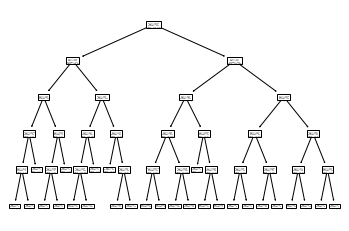

In [92]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred )*100)
from sklearn.metrics import recall_score
print ('Validation Results')
print ( clf.score(X_train, y_train))
print (recall_score(y_train, clf.predict(X_train)))
print ('\nTest Results')
print (clf.score(X_test, y_test))
import matplotlib as mlb
print (recall_score(y_test, clf.predict(X_test)))
from sklearn import tree
tree.plot_tree(clf)

In [94]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[90 16]
 [46 26]]
Accuracy :  0.651685393258427


In [90]:
!pip install matplotlib